In [63]:
# Import necessary libraries
import pandas as pd

# Load the data files
imdb_title_basics = pd.read_csv('title.basics.csv')
imdb_title_ratings = pd.read_csv('title.ratings.csv')
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

# Explore the data structure
# checking the first few rows of each dataset to understand the data.
print("imdb.title.basics:")
print(imdb_title_basics.head())

print("imdb.title.ratings:")
print(imdb_title_ratings.head())

print("bom.movie_gross:")
print(bom_movie_gross.head())

imdb.title.basics:
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
imdb.title.ratings:
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt104372

In [69]:
# Check data types and missing values
print("Data Types - imdb.title.basics:")
print(imdb_title_basics.dtypes)
print("Missing Values - imdb.title.basics:")
print(imdb_title_basics.isnull().sum())

print("Data Types - imdb.title.ratings:")
print(imdb_title_ratings.dtypes)
print("Missing Values - imdb.title.ratings:")
print(imdb_title_ratings.isnull().sum())

print("Data Types - bom.movie_gross:")
print(bom_movie_gross.dtypes)
print("Missing Values - bom.movie_gross:")
print(bom_movie_gross.isnull().sum())

Data Types - imdb.title.basics:
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object
Missing Values - imdb.title.basics:
tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
Data Types - imdb.title.ratings:
tconst            object
averagerating    float64
numvotes           int64
dtype: object
Missing Values - imdb.title.ratings:
tconst           0
averagerating    0
numvotes         0
dtype: int64
Data Types - bom.movie_gross:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
Missing Values - bom.movie_gross:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [70]:
# Data Cleaning and Preprocessing
# Handle missing values
# Drop runtime_minutes as the missing values are significant
imdb_title_basics = imdb_title_basics.drop('runtime_minutes', axis=1)
print("Updated imdb.title.basics:")
print(imdb_title_basics.head())


Updated imdb.title.basics:
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year                genres  
0        2013    Action,Crime,Drama  
1        2019       Biography,Drama  
2        2018                 Drama  
3        2018          Comedy,Drama  
4        2017  Comedy,Drama,Fantasy  


In [72]:
#change the NaN values in foreign_gross to zero.
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross['domestic_gross'].fillna(0, inplace=True)

In [71]:
#most common genre
most_common_genre = movie_data['genres'].mode()[0]
movie_data['genres'].fillna(most_common_genre, inplace=True)
print("Updated DataFrame with NaN values replaced in 'genres':")
print(movie_data)


Updated DataFrame with NaN values replaced in 'genres':
         tconst              primary_title             original_title  \
0     tt0315642                      Wazir                      Wazir   
0     tt0315642                      Wazir                      Wazir   
0     tt0315642                      Wazir                      Wazir   
1     tt0337692                On the Road                On the Road   
1     tt0337692                On the Road                On the Road   
...         ...                        ...                        ...   
3024  tt8427036            Helicopter Eela            Helicopter Eela   
3025  tt9078374                Last Letter             Ni hao, Zhihua   
3025  tt9078374                Last Letter             Ni hao, Zhihua   
3026  tt9151704  Burn the Stage: The Movie  Burn the Stage: The Movie   
3026  tt9151704  Burn the Stage: The Movie  Burn the Stage: The Movie   

      start_year       genres  averagerating  numvotes  \
0        

In [73]:
#merge the three tables
movie_data = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='inner')
movie_data = pd.merge(movie_data, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')
movie_data

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,Drama,7.1,147,The Chambermaid,FM,300.0,0,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,Drama,5.4,673,Helicopter Eela,Eros,72000.0,0,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,0,2018


In [57]:
#further data exploration, analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
#exploring best genres-filtering for the last 8 years to have a wider scope
current_year = 2023
recent_years = range(current_year - 8, current_year + 1)
recent_movies = movie_data[movie_data['start_year'].isin(recent_years)]
#counting the genres
genres_count = recent_movies['genres'].str.split(',', expand=True).stack().value_counts()
genres_count
#grouping my data by genres and years
genre_by_year = recent_movies.groupby(['start_year', 'genres']).size().unstack(fill_value=0)
genre_by_year

genres,Action,"Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Crime","Action,Adventure,Drama","Action,Adventure,Family","Action,Adventure,Fantasy","Action,Adventure,Horror","Action,Adventure,Sci-Fi",...,"Horror,Mystery,Thriller","Horror,Romance","Horror,Sci-Fi,Thriller","Horror,Thriller",Mystery,"Mystery,Romance,Thriller","Mystery,Thriller",Romance,Sci-Fi,Thriller
start_year,,,,,,,,,,,,,,,,,,,,,
2015,1,5,2,5,3,4,1,1,0,7,...,5,0,0,2,0,0,1,3,0,1
2016,1,4,0,6,3,7,1,7,0,6,...,3,1,0,5,0,1,0,0,0,3
2017,1,1,0,7,0,5,0,7,0,2,...,3,0,1,2,1,0,0,0,0,3
2018,1,2,1,4,1,1,0,5,2,5,...,4,0,0,2,1,0,1,2,1,1
2019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


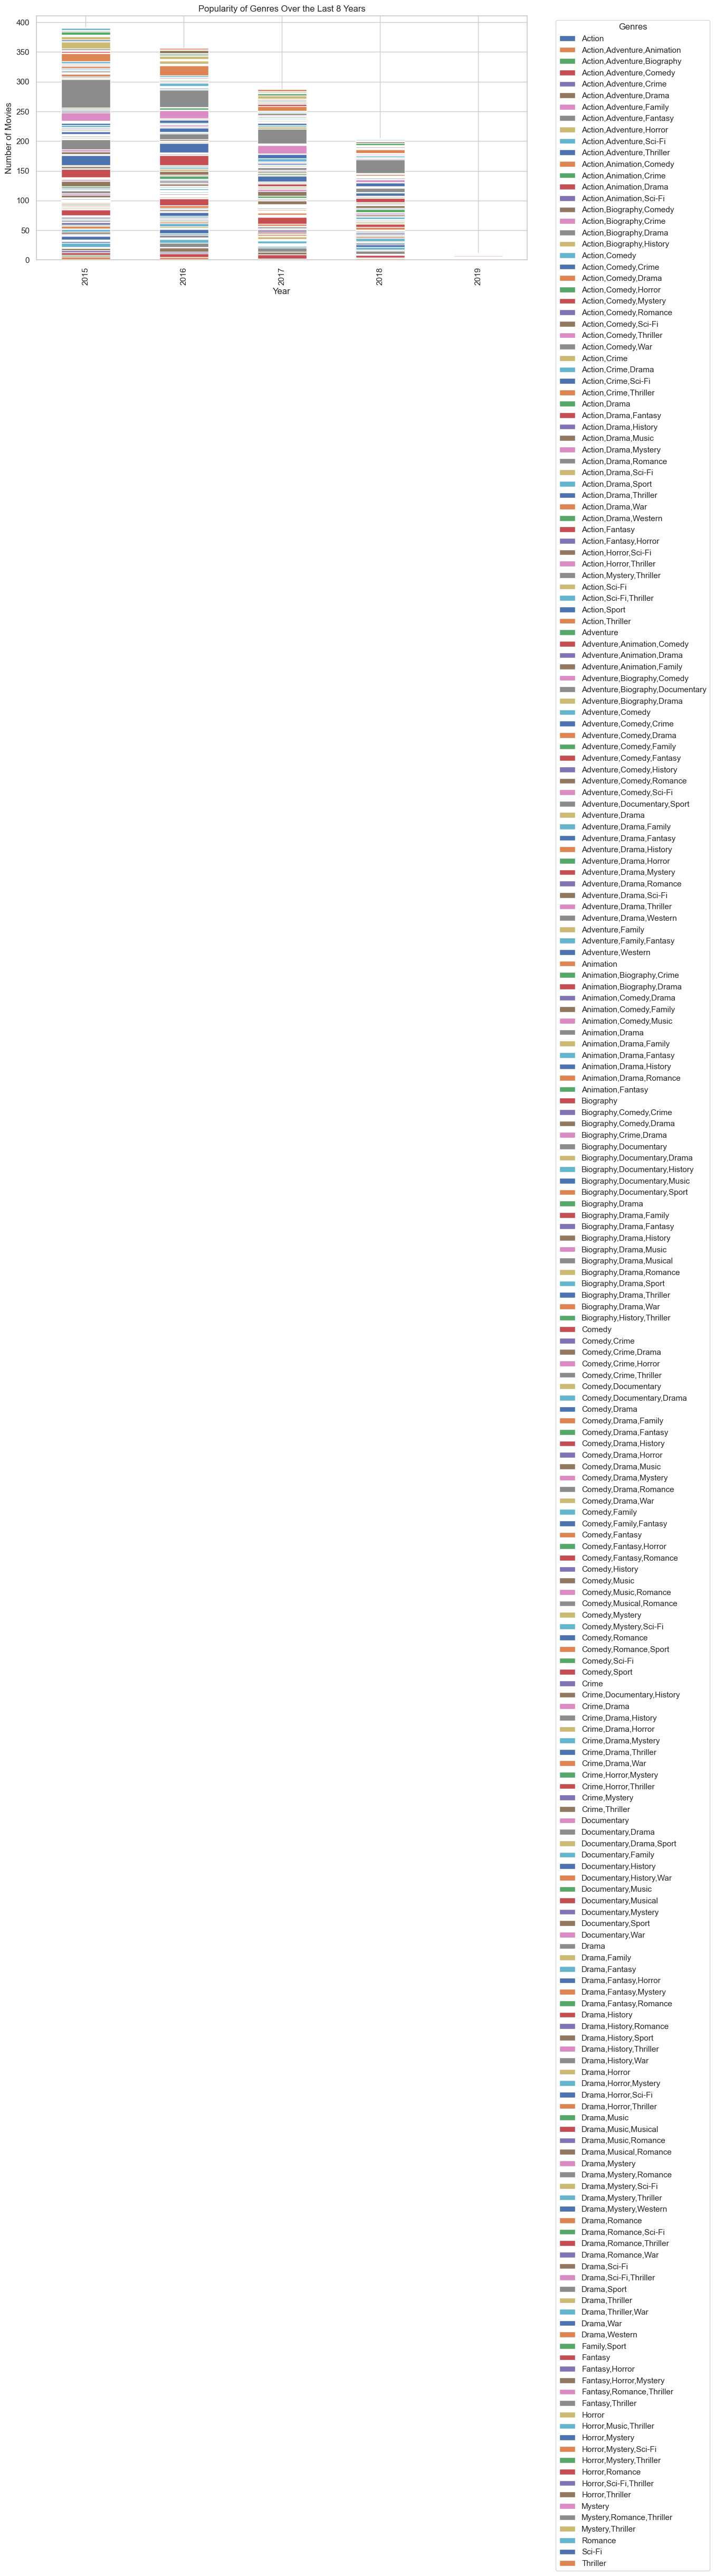

In [87]:
#visualize using genres
genre_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Popularity of Genres Over the Last 8 Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
#data exploration 2 using the ratings given
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#finding a relationship between the rating given and the domestic gross
correlation = movie_data['averagerating'].corr(movie_data['domestic_gross'])
print("Correlation between IMDb Ratings and Domestic Gross:", correlation)


Correlation between IMDb Ratings and Domestic Gross: 0.15685267428572924


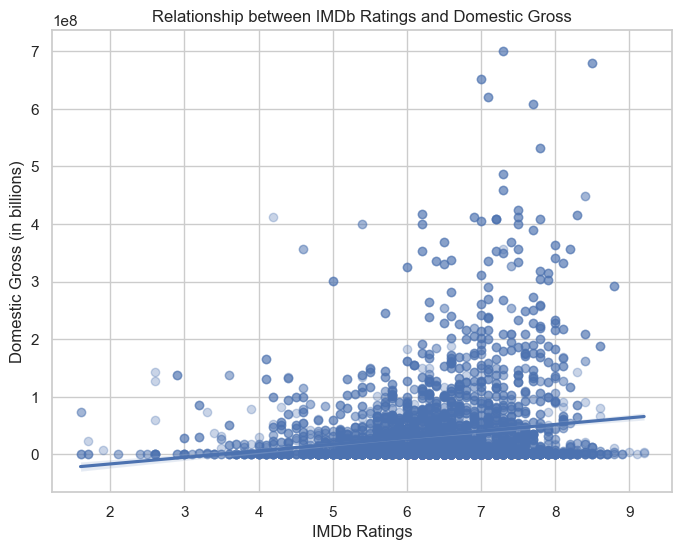

In [45]:
#visualization of the relationship between rating given and domestic gross
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

sns.regplot(x='averagerating', y='domestic_gross', data=movie_data, scatter_kws={'alpha':0.3})
plt.title("Relationship between IMDb Ratings and Domestic Gross")
plt.xlabel("IMDb Ratings")
plt.ylabel("Domestic Gross (in billions)")

plt.show()

In [61]:
#domestic_gross and genres analysis
movie_data['genres'] = movie_data['genres'].astype(str)
movie_data['genres'] = movie_data['genres'].str.split(',')
movie_data = movie_data.explode('genres')
average_gross_by_genre = movie_data.groupby('genres')['domestic_gross'].mean().reset_index()
print("Average Box Office Gross by Genre:")
print(average_gross_by_genre)



Average Box Office Gross by Genre:
         genres  domestic_gross
0        Action    5.890131e+07
1     Adventure    9.499375e+07
2     Animation    8.795868e+07
3     Biography    2.052287e+07
4        Comedy    3.407490e+07
5         Crime    2.438643e+07
6   Documentary    1.282995e+07
7         Drama    1.633473e+07
8        Family    4.704754e+07
9       Fantasy    5.343800e+07
10      History    1.804056e+07
11       Horror    2.721676e+07
12        Music    1.700469e+07
13      Musical    3.058807e+07
14      Mystery    2.324112e+07
15         News    5.410350e+06
16      Romance    1.506235e+07
17       Sci-Fi    1.107659e+08
18        Sport    3.991252e+07
19     Thriller    2.967712e+07
20          War    5.106849e+06
21      Western    2.470399e+07
22          nan    5.037271e+07


In [62]:
#top 10 genres with highest domestic_gross
top_genres_by_gross = average_gross_by_genre.sort_values(by='domestic_gross', ascending=False)
top_ten_genres = top_genres_by_gross.head(10)
print("Top Ten Genres by Domestic Gross:")
print(top_ten_genres)
                                                         

Top Ten Genres by Domestic Gross:
       genres  domestic_gross
17     Sci-Fi    1.107659e+08
1   Adventure    9.499375e+07
2   Animation    8.795868e+07
0      Action    5.890131e+07
9     Fantasy    5.343800e+07
22        nan    5.037271e+07
8      Family    4.704754e+07
18      Sport    3.991252e+07
4      Comedy    3.407490e+07
13    Musical    3.058807e+07


In [66]:
#Total income both domestic and foreign
total_gross_by_genre = movie_data.groupby('genres')['domestic_gross'].sum().reset_index()
total_gross_by_genre = total_gross_by_genre.sort_values(by='domestic_gross', ascending=False)
top_10_genres = total_gross_by_genre.head(10)
print("Top 10 Genres by Domestic Gross:")
print(top_10_genres)

Top 10 Genres by Domestic Gross:
       genres  domestic_gross
1   Adventure    4.170226e+10
0      Action    3.805024e+10
4      Comedy    3.155336e+10
7       Drama    2.868379e+10
17     Sci-Fi    1.495340e+10
19   Thriller    1.344374e+10
2   Animation    1.336972e+10
5       Crime    9.315617e+09
9     Fantasy    9.084459e+09
16    Romance    7.049182e+09


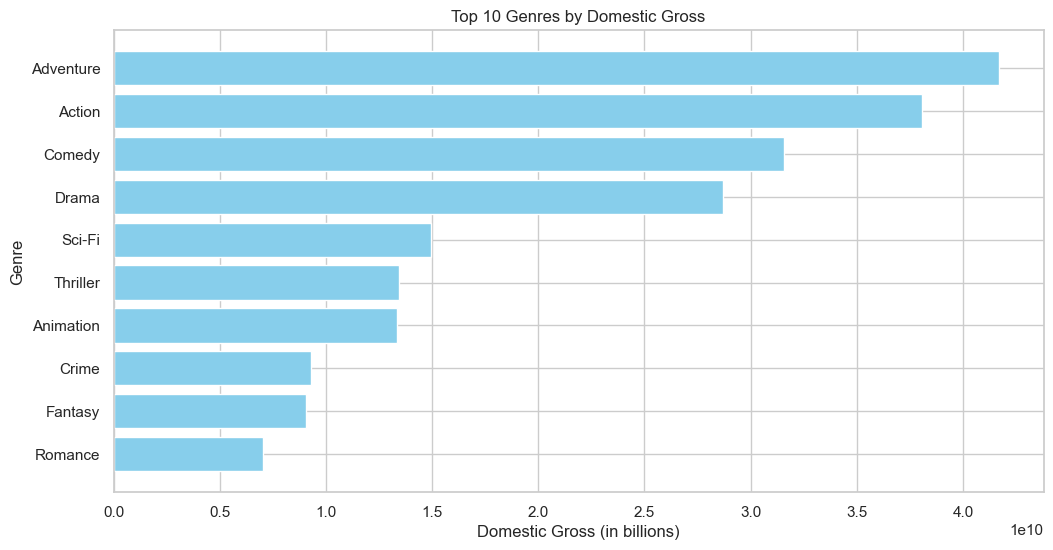

In [67]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_genres['genres'], top_10_genres['domestic_gross'], color='skyblue')
plt.xlabel('Domestic Gross (in billions)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Domestic Gross')
plt.gca().invert_yaxis()  # To display the highest grossing genre at the top
plt.show()

In [81]:
#foreign gross per genre
movie_data['foreign_gross'] = pd.to_numeric(movie_data['foreign_gross'], errors='coerce')
total_foreign_gross_by_genre = movie_data.groupby('genres')['foreign_gross'].sum().reset_index()
total_foreign_gross_by_genre = total_foreign_gross_by_genre.sort_values(by='foreign_gross', ascending=False)
top_10_foreign_gross = total_foreign_gross_by_genre.head(10)
print("Top 10 Genres by Total Foreign Gross:")
print(top_10_foreign_gross)

Top 10 Genres by Total Foreign Gross:
                         genres  foreign_gross
79   Adventure,Animation,Comedy   1.796220e+10
11      Action,Adventure,Sci-Fi   1.661140e+10
8      Action,Adventure,Fantasy   8.936100e+09
4       Action,Adventure,Comedy   6.494200e+09
12    Action,Adventure,Thriller   4.748300e+09
2    Action,Adventure,Animation   4.269500e+09
249                       Drama   3.662962e+09
6        Action,Adventure,Drama   3.606564e+09
163                      Comedy   2.455574e+09
77              Action,Thriller   2.429100e+09


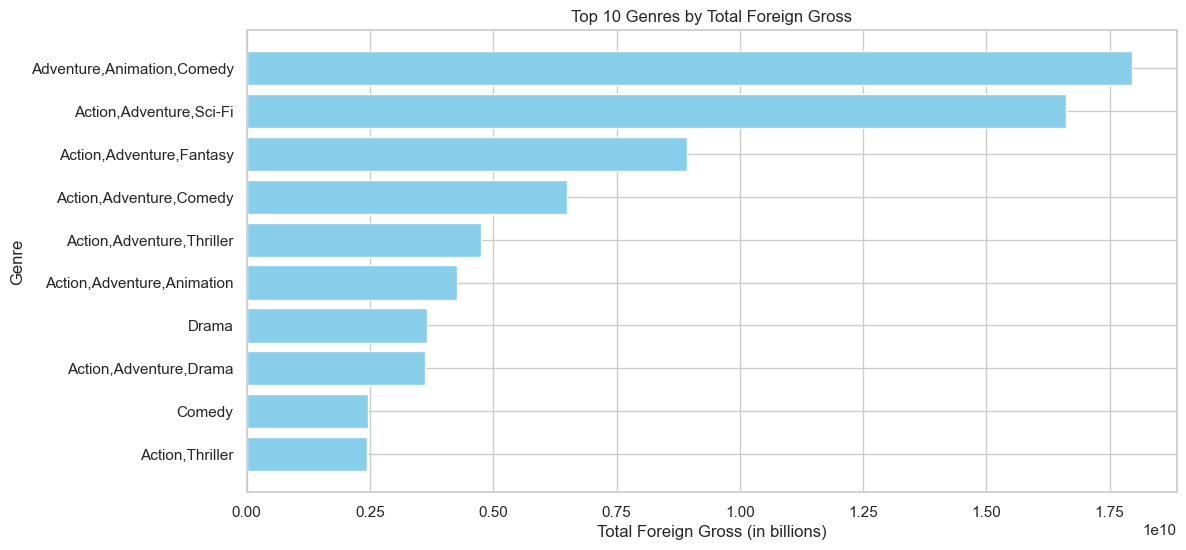

In [83]:
#visualize the total foreign gross in billions
plt.figure(figsize=(12, 6))
plt.barh(top_10_foreign_gross['genres'], top_10_foreign_gross['foreign_gross'], color='skyblue')
plt.xlabel('Total Foreign Gross (in billions)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Total Foreign Gross')
plt.gca().invert_yaxis()  # To display the highest foreign gross genre at the top
plt.show()

In [88]:
#Total income both domestic and foreign
total_gross_by_genre = movie_data.groupby('genres')[['domestic_gross', 'foreign_gross']].sum().reset_index()
total_gross_by_genre['combined_gross'] = total_gross_by_genre['domestic_gross'] + total_gross_by_genre['foreign_gross']
total_gross_by_genre = total_gross_by_genre.sort_values(by='combined_gross', ascending=False)
print("Total Gross (Domestic + Foreign) by Genre (Ranked):")
print(total_gross_by_genre)

Total Gross (Domestic + Foreign) by Genre (Ranked):
                           genres  domestic_gross  foreign_gross  \
11        Action,Adventure,Sci-Fi    1.102470e+10   1.661140e+10   
79     Adventure,Animation,Comedy    9.645133e+09   1.796220e+10   
8        Action,Adventure,Fantasy    4.378787e+09   8.936100e+09   
4         Action,Adventure,Comedy    3.172472e+09   6.494200e+09   
249                         Drama    3.047694e+09   3.662962e+09   
..                            ...             ...            ...   
240      Documentary,History,News    1.320000e+04   0.000000e+00   
65                  Action,Horror    7.900000e+03   0.000000e+00   
241  Documentary,History,Thriller    7.100000e+03   0.000000e+00   
289             Drama,War,Western    5.300000e+03   0.000000e+00   
137                     Biography    4.300000e+03   0.000000e+00   

     combined_gross  
11     2.763610e+10  
79     2.760733e+10  
8      1.331489e+10  
4      9.666672e+09  
249    6.710656e+09  